In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# Load Data

In [67]:
df_train = pd.read_csv('/kaggle/input/medical-insurance-cost-dataset/insurance.csv')

# Data Overview

In [68]:
df_train.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [69]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [70]:
df_train.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [71]:
df_train['smoker'] = df_train['smoker'].str.lower().map({'yes': 1, 'no': 0})
df_train['sex'] = df_train['sex'].str.lower().map({'female': 1, 'male': 0})

df_train = pd.get_dummies(df_train, columns=['region'])

# EDA & Visualize

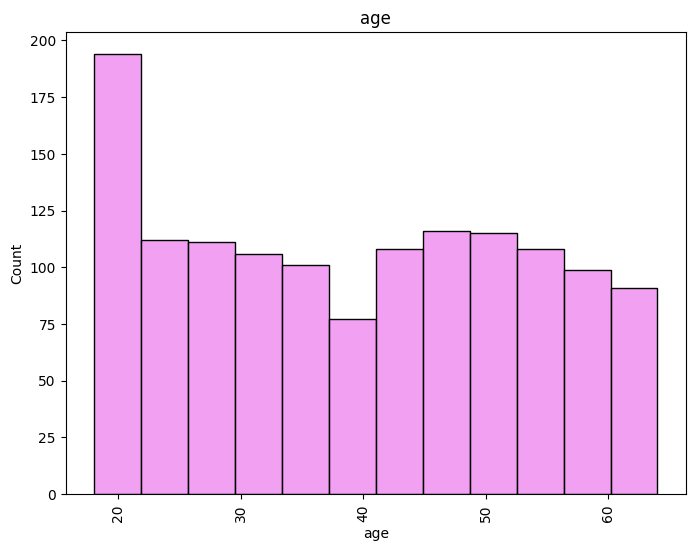

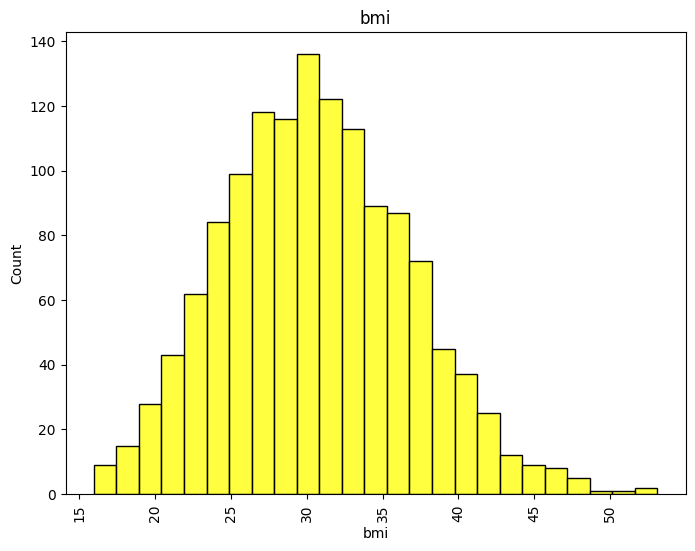

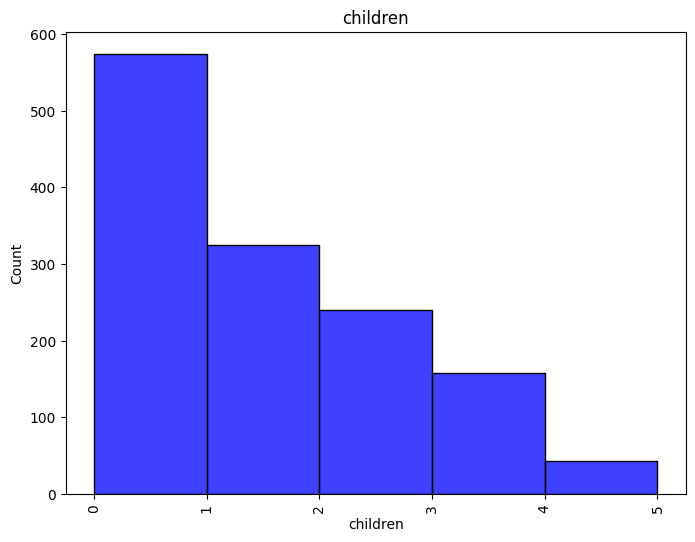

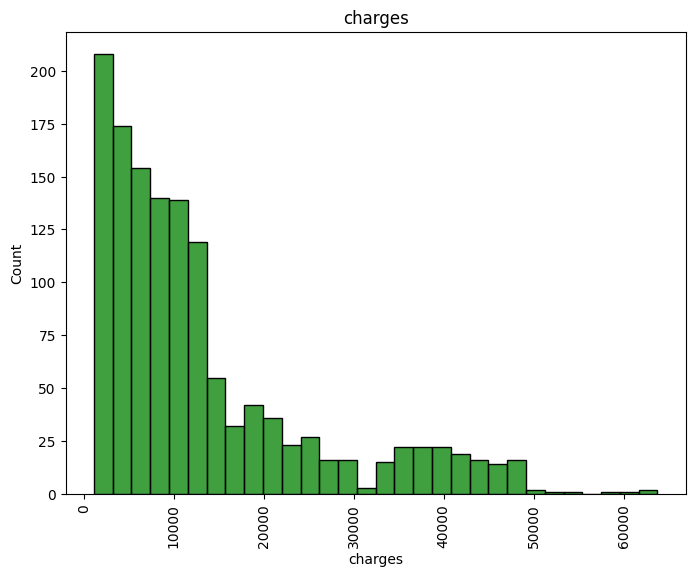

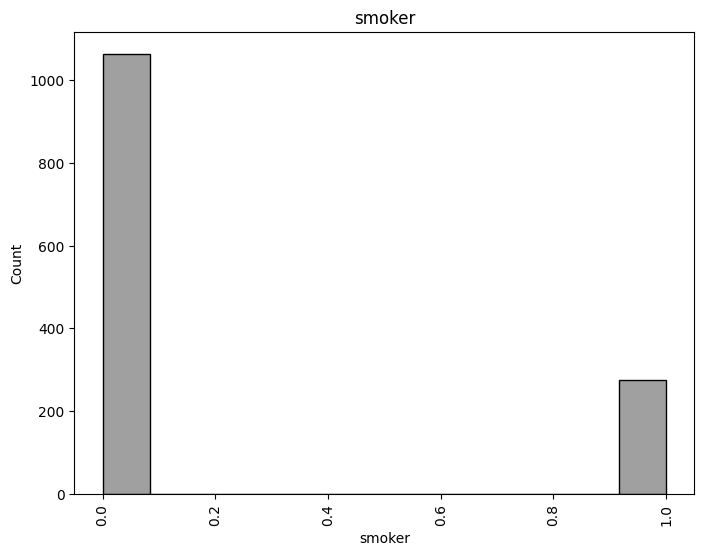

In [72]:
# Univariate analysis



# age
plt.figure(figsize=(8,6))
sns.histplot(df_train['age'], color='violet')
plt.title('age')
plt.xticks(rotation=90)
plt.show()

# bmi
plt.figure(figsize=(8,6))
sns.histplot(df_train['bmi'], color='yellow')
plt.title('bmi')
plt.xticks(rotation=90)
plt.show()

# children
plt.figure(figsize=(8,6))
sns.histplot(df_train['children'],binwidth=1, color='blue')
plt.title('children')
plt.xticks(rotation=90)
plt.show()

# charges
plt.figure(figsize=(8,6))
sns.histplot(df_train['charges'], color='green')
plt.title('charges')
plt.xticks(rotation=90)
plt.show()

# smoker
plt.figure(figsize=(8,6))
sns.histplot(df_train['smoker'], color='gray')
plt.title('smoker')
plt.xticks(rotation=90)
plt.show()

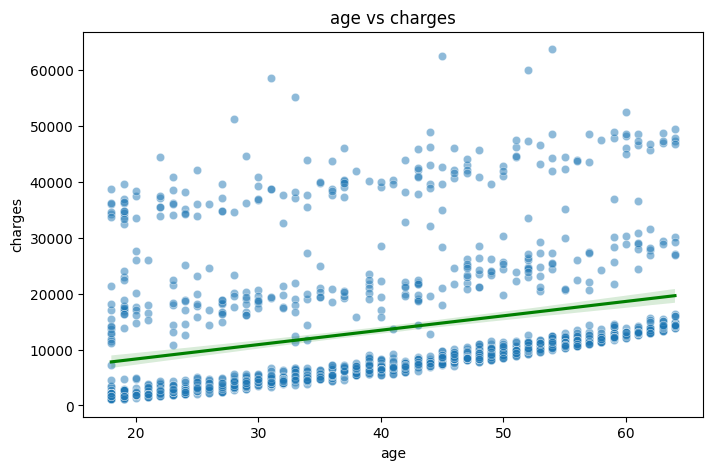

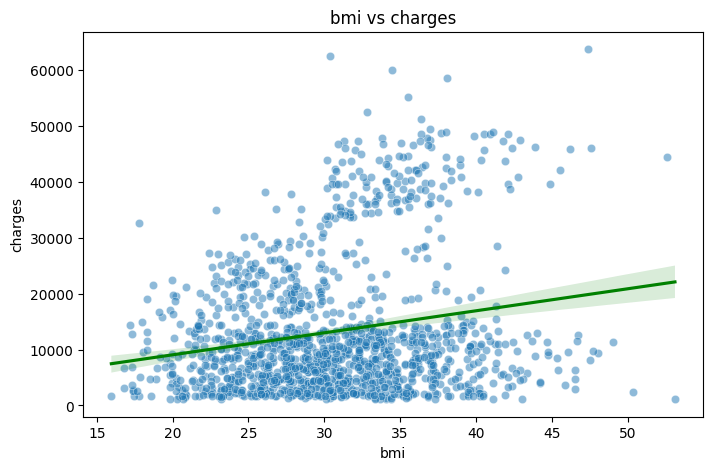

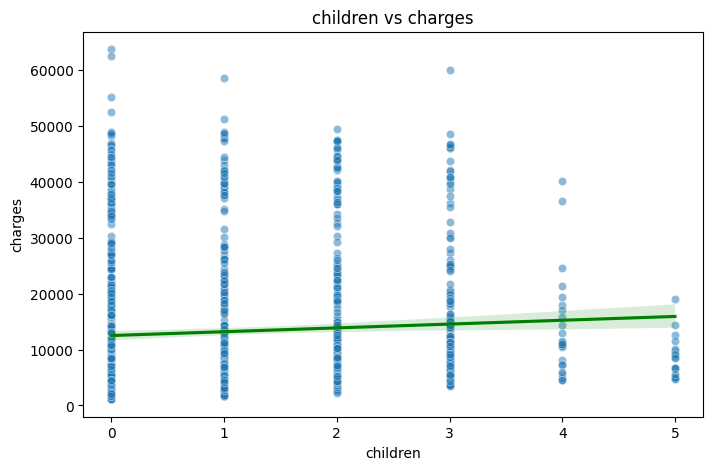

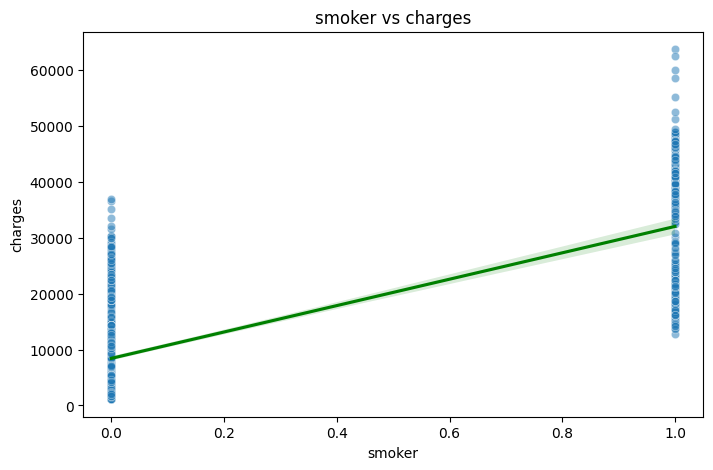

In [73]:
# Bivariate Multivariate Analysis

# age vs charges
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_train,
    x='age',
    y='charges',
    alpha=0.5
)
sns.regplot(data=df_train, x='age', y='charges', scatter=False, color='green')
plt.title('age vs charges')
plt.show()

# bmi vs charges
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_train,
    x='bmi',
    y='charges',
    alpha=0.5
)
sns.regplot(data=df_train, x='bmi', y='charges', scatter=False, color='green')
plt.title('bmi vs charges')
plt.show()

# children vs charges
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_train,
    x='children',
    y='charges',
    alpha=0.5
)
sns.regplot(data=df_train, x='children', y='charges', scatter=False, color='green')
plt.title('children vs charges')
plt.show()

# smoker vs charges
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_train,
    x='smoker',
    y='charges',
    alpha=0.5
)
sns.regplot(data=df_train, x='smoker', y='charges', scatter=False, color='green')
plt.title('smoker vs charges')
plt.show()

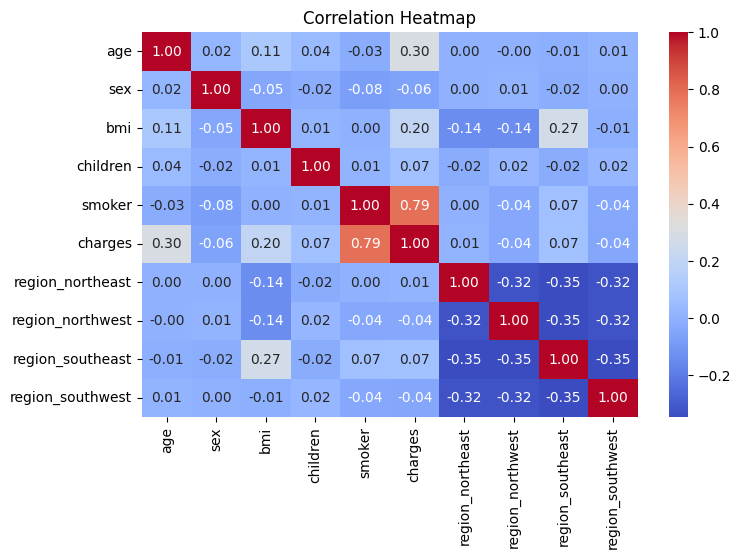

In [74]:
# Correlation Heatmap
corr = df_train.corr()

plt.figure(figsize=(8,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()